<img width=150 src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/NumPy_logo.svg/200px-NumPy_logo.svg.png"></img>

* 目標：
  * 了解如何使用 seaaborn 做到視覺化效果
  * 視覺化的處理流程與效果
* 重點：不同型態的類別要套用的對應圖像是不一樣的

In [2]:
# 導入必要的程式庫
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# 以 Seaborn 內建的 IRIS 資料集

In [3]:
# 取得鳶尾花資料集
df = sns.load_dataset('iris')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


* 內容：行和列的數量、列名稱、數據類型、空值數
* dtypes：
  * object (含不同型態)
  * int64
  * float64
  * datetime64
  * bool

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Boxplot

* 箱形圖顯示數據的總體分布，同時繪製異常值的數據點。這個物理點讓它們的特定值在樣本之間容易被識別和比較
* 數據中的任何異常值都繪製為單個點
* 分布的擴散差不多是相等的，並且可以很容易地比較異常值

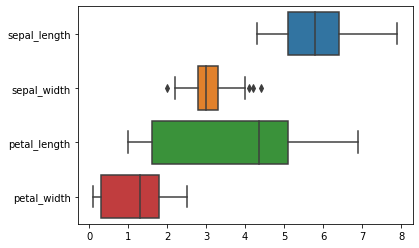

In [5]:
# 直接使用 PANDAS dataframe，當作參數

sns.boxplot(data=df, orient='h')
plt.show()

* 常用參數：
  * hue：對同一行再進行別的分類
  * dodge：在用 hue 之後，數據會變得凌亂，可以用 dodge 沿著座標軸將再細分的類分開
  * orient：控制方向 (水平或垂直)
* 參考：Day22_Distribution

## Stripplot

* 當一個或兩個正在研究的變數是分類的時，我們使用像條帶線()、swarmplot() 等的圖
* 查看到每個物種 petal_length 的差異。但是，散點圖的主要問題是散點圖上的點重疊

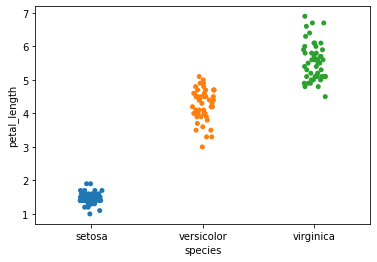

In [6]:
sns.stripplot(x='species', y='petal_length', data=df)
plt.show()

* 常用參數：
  * jitter(抖動)：若資料集太集中，看起來會變成一直線，這個參數可產生干擾/雜訊(如把 uniform distribution 的寬變成 1/2)讓數據沿分類軸調整位置

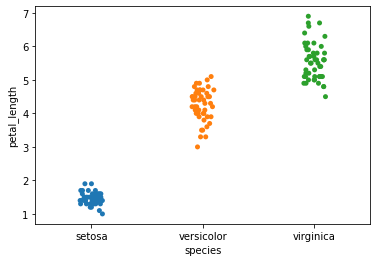

In [7]:
sns.stripplot(x='species', y='petal_length', data=df, jitter=True)
plt.show()

## Swarmplot (函數群圖)

* 此函數將散點圖的每個點都放在分類軸上，從而避免重疊點 
* 另一個不使用 jitter 就能使點分離，可用作「抖動」的替代選項

D:\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


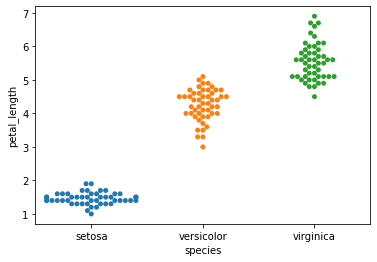

In [8]:
sns.swarmplot(x='species', y='petal_length', data=df)
plt.show()

## 合併使用

D:\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='species', ylabel='petal_length'>

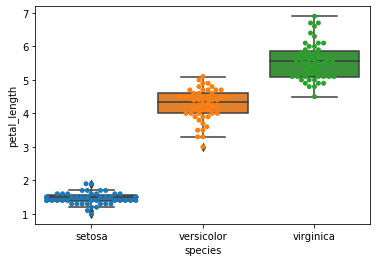

In [9]:
sns.boxplot(x='species', y='petal_length', data = df)
sns.swarmplot(x='species', y='petal_length', data = df)

## 核密度估計(Kernel Density Estimates, KDE)

* 核密度估計：採用平滑的峰值函數("核")來擬合觀察到的數據點，簡單來說，就是把離散轉為連續進行觀察
* 曲線圖能更加準確地反映總體的基本變量
* 所有平滑的峰值函數均可作為 KDE 的核函數來使用，核函數要符合：
  * 正規化 (也就是函數下面積的範圍為[0,1]) 
  * K(-u)=K(u)
* 重要特性
  * 在數據點處為波峰
  * 曲線下方面積為 1
  * 函數曲線需囊括所有可能出現的數據值的情況
    $ \widehat{f}_h(x) = \frac{1}{n} \sum_{i=1}^{n} K_h(x-x_i) = \frac{1}{nh} \sum_{i=1}^{n} K( \frac{x-x_i}{h} ) $

## Pairplot

* 可觀察每個情節的變化。繪圖採用矩陣格式，其中行名表示 x 軸，列名稱表示 y 軸
* 對角線圖是內核密度圖，其中其他圖是散點圖
* hue 在 sns.pairplot 函數調用中使用關鍵字

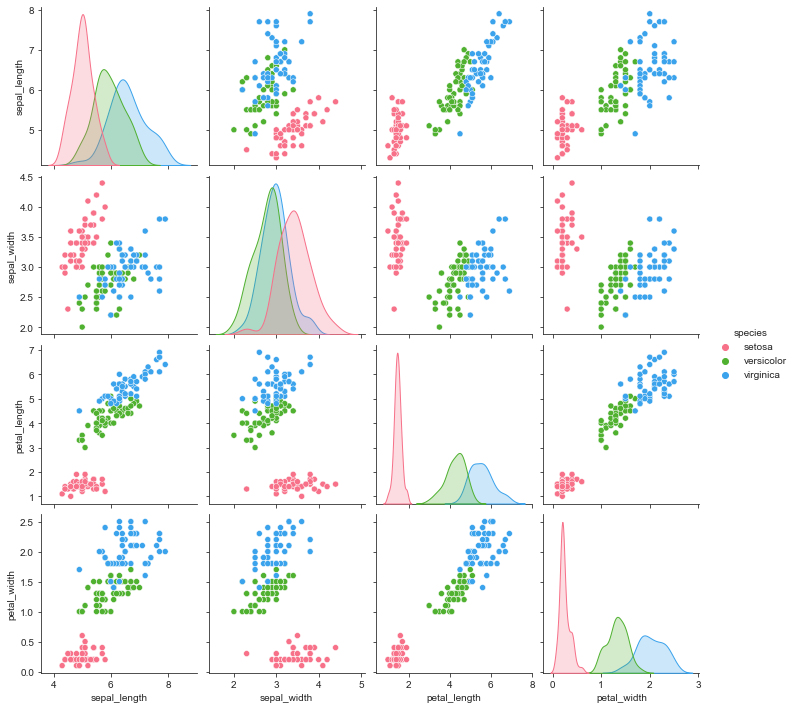

In [12]:
#sns.set_style('ticks') #STYLE初始化
sns.pairplot(df, hue='species', diag_kind='kde', kind='scatter', palette='husl')
plt.show()

* 觀察上圖：
  1. 可以觀察每個情節的變化，繪圖採用矩陣格式
  2. 對角線圖是內核密度圖，其中其他圖是散點圖
* 常用參數： 
  * kind：用於控制非對角線 (左上至右下) 上的圖形，可選 "scatter" (散點圖) 與 "reg" (回歸直線)
  * diag_kind：用於控制對角線上的圖形，可選 "hist" (直方圖)與 "kde" (曲線圖)

D:\anaconda3\lib\site-packages\seaborn\distributions.py:1134: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:1134: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:1134: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:1134: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:1134: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:1134: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


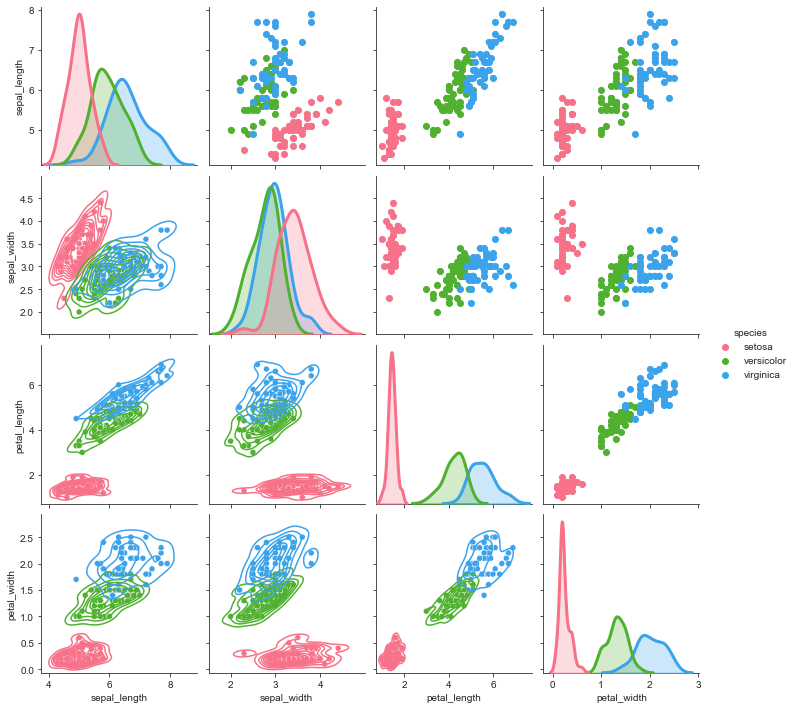

In [13]:
# 可以在上三角形和下三角形使用不同的函數來查看關係的不同方面
g = sns.pairplot(df, hue='species', diag_kind='kde', kind='scatter', palette='husl')
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap='Blues_d')
g.map_diag(sns.kdeplot, lw=3, legend=False)
plt.show()

## 不小心移除程式碼

In [ ]:
# 查詢歷史紀錄

for line in locals()['In']:
     print(line)
# or
history